In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [58]:
import sys
sys.path.append("/export/raid1/home/styvesg/code/")

import nsd_gnet8x.src.numpy_utility as pnu
from nsd_gnet8x.src.file_utility import save_stuff, flatten_dict, embed_dict, zip_dict
from nsd_gnet8x.src.config import *

from src.utility import *

%matplotlib inline

In [4]:
#model_dir = "../../results/nsd/multisubject/gnet_mpf_general_May-14-2021_0535/"
model_dir = "../nsd_gnet8x/output/multisubject/gnet8j64t192_mpf_general_Jan-25-2023_1316/"
#model_dir = "../nsd_gnet8x/output/multisubject/gnet8j64t192_mpf_general_v2_Apr-21-2023_1452/"
#model_dir = "../nsd_gnet8x/output/multisubject/anet_fwrf_nsdgeneral_Feb-02-2022_1002/"
#model_dir =  "/export/raid1/home/styvesg/code/nsd_gnet8x/output/multisubject/gnet8j64_random_mpf_evc_Nov-11-2022_1028/"

input_dir = model_dir
output_dir = root_dir + 'output/'

stim_dir = root_dir+'../../data/nsd/stims/'
voxel_dir = root_dir+'../../data/nsd/voxels/'

exp_design_file = root_dir+"../../data/nsd/nsd_expdesign.mat"

In [5]:
from src.utility import get_n_random_thing_samples

# Reload stim and labels

In [6]:
subjects = [1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
from nsd_gnet8x.src.load_nsd import image_feature_fn

stim_data = {}
for s in subjects: 
    image_data_set = h5py.File(stim_dir + "S%d_stimuli_227.h5py"%s, 'r')
    stim_data[s] = image_feature_fn(np.copy(image_data_set['stimuli']))
    image_data_set.close()
    print ('--------  subject %d  -------' % s)
    print ('block size:', stim_data[s].shape, ', dtype:', stim_data[s].dtype, ', value range:',\
           np.min(stim_data[s][0]), np.max(stim_data[s][0]))

--------  subject 1  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 2  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 3  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 4  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 5  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 6  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 7  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0
--------  subject 8  -------
block size: (10000, 3, 227, 227) , dtype: float32 , value range: 0.0 1.0


In [8]:
cat_data = {}
for s in subjects: 
    cat_data_set = h5py.File(stim_dir + "S%d_supercategory_227.h5py"%s, 'r')
    cat_data[s] = embed_dict({s: np.copy(d) for s,d in cat_data_set.items()})
    cat_data_set.close()
    print ('--------  subject %d  -------' % s)
    print (cat_data[s].keys())
    #print ('block size:', stim_data[s].shape, ', dtype:', stim_data[s].dtype, ', value range:',\
    #       np.min(stim_data[s][0]), np.max(stim_data[s][0]))

--------  subject 1  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 2  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 3  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 4  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 5  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 6  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 7  -------
dict_keys(['label_count', 'label_map', 'labels'])
--------  subject 8  -------
dict_keys(['label_count', 'label_map', 'labels'])


## Things supercategory: outdoor food indoor appliance kitchen sports person animal vehicle accessory electronic furniture

In [9]:
print (cat_data[1]['label_map'])

{'0': array(b'appliance', dtype=object), '1': array(b'accessory', dtype=object), '10': array(b'person', dtype=object), '11': array(b'animal', dtype=object), '12': array(b'sky', dtype=object), '13': array(b'floor', dtype=object), '14': array(b'furniture-stuff', dtype=object), '15': array(b'ground', dtype=object), '16': array(b'food-stuff', dtype=object), '17': array(b'solid', dtype=object), '18': array(b'water', dtype=object), '19': array(b'plant', dtype=object), '2': array(b'kitchen', dtype=object), '20': array(b'textile', dtype=object), '21': array(b'window', dtype=object), '22': array(b'wall', dtype=object), '23': array(b'ceiling', dtype=object), '24': array(b'other', dtype=object), '25': array(b'structural', dtype=object), '26': array(b'building', dtype=object), '27': array(b'raw-material', dtype=object), '3': array(b'furniture', dtype=object), '4': array(b'indoor', dtype=object), '5': array(b'outdoor', dtype=object), '6': array(b'vehicle', dtype=object), '7': array(b'electronic', d

In [10]:
thing_label_index = np.array([0,1,2,3,4,5,6,7,8,9,10,11]) #np.array([0,1,3, 2, 4,7, 8, 9,11, 10,15,20, 12, 22,17])
map_label_index_to_local_label = {j: i for i,j in enumerate(thing_label_index)}
thing_labelmap = {int(i): ('%s' % cat_data[1]['label_map']['%d'%j])[2:-1] for i,j in enumerate(thing_label_index)}
supercat_colors = {k: cm.get_cmap('rainbow', len(thing_labelmap))(k) for k,name in thing_labelmap.items()}

print (thing_labelmap)

{0: 'appliance', 1: 'accessory', 2: 'kitchen', 3: 'furniture', 4: 'indoor', 5: 'outdoor', 6: 'vehicle', 7: 'electronic', 8: 'sports', 9: 'food', 10: 'person', 11: 'animal'}


In [11]:
from src.utility import intersection

things_mh = {s: np.zeros(shape=(len(cat_data[s]['labels']), len(thing_label_index))) for s in subjects}
for s in subjects:
    for k,lim in enumerate(cat_data[s]['labels']):
        uni = np.unique(lim)
        uni_thing = intersection(uni, thing_label_index)
        things_mh[s][k, uni_thing] = 1 # this only works because the index are already a minimal set starting at zero

# Reload nsd predictions and masks

In [12]:
data_set = h5py.File(model_dir + 'nsd_prediction_all.h5py', 'r')
#data_set = h5py.File(model_dir + 'nsd_stim_pred_all.h5py', 'r')
nsd_stim_pred_dict = embed_dict({s: np.copy(d) for s,d in data_set.items()})
data_set.close()
print (nsd_stim_pred_dict.keys())

dict_keys(['brain_nii_shape', 'pred', 'val_cc', 'voxel_index', 'voxel_mask', 'voxel_roi'])


In [13]:
nsdpred_supercat_all = {int(s): v for s,v in nsd_stim_pred_dict['pred'].items()}

---
# Voxel masks

In [14]:
from nsd_gnet8x.src.file_utility import load_mask_from_nii, view_data
from nsd_gnet8x.src.roi import roi_map, iterate_roi
from matplotlib import cm

#voxel_strm_roi
stream_names = ['early', 'midventral', 'midlateral', 'midparietal', 'ventral', 'lateral', 'parietal']
stream_group = [[1], [2], [3], [4], [5], [6], [7]]

group_names = ['V1', 'V2', 'V3', 'hV4', 'V3ab', 'LO', 'IPS', 'VO', 'PHC', 'MT', 'MST', 'other']
group = [[1,2],[3,4],[5,6], [7], [16, 17], [14, 15], [18,19,20,21,22,23], [8, 9], [10,11], [13], [12], [24,25,0]]

plot_roi = ['V1', 'V2', 'V3', 'hV4', 'MST', 'V3ab', 'MT', 'PHC', 'VO', 'LO', 'IPS']
roi_cmap = {roi: cm.get_cmap('rainbow', len(plot_roi))(k) for k,roi in enumerate(plot_roi)}
subj_cmap = {s: cm.get_cmap('rainbow', 9)(k+1) for k,s in enumerate(subjects)}

In [15]:
voxel_roi, voxel_mask, voxel_index, brain_nii_shape, nsdcore_val_cc = {}, {}, {}, {}, {}
for s, m, r, i, b, c in zip_dict(nsd_stim_pred_dict['voxel_mask'],
                             nsd_stim_pred_dict['voxel_roi'],
                             nsd_stim_pred_dict['voxel_index'],
                             nsd_stim_pred_dict['brain_nii_shape'],
                             nsd_stim_pred_dict['val_cc']):
    voxel_mask[int(s)], voxel_roi[int(s)], voxel_index[int(s)], brain_nii_shape[int(s)], nsdcore_val_cc[int(s)]= m,r,i,b,c

In [16]:
beta_dir =    "/export/raid1/home/surly/raid1/kendrick-data/nsd/nsddata_betas/ppdata/"
mask_dir_sh = "/export/raid1/home/surly/raid1/kendrick-data/nsd/nsddata/ppdata/"

voxel_prf_roi, voxel_kast_roi, voxel_strm_roi, voxel_ncsnr, voxel_NC = {}, {}, {}, {}, {}
for k,s in enumerate(subjects):
    print ('--------  subject %d  -------' % s)

    #voxel_roi_full  = load_mask_from_nii(mask_dir_sh + "subj%02d/func1pt8mm/roi/prf-visualrois.nii.gz"%s)
    #voxel_kast_full = load_mask_from_nii(mask_dir_sh + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%(s))
    #voxel_strm_full = load_mask_from_nii(mask_dir_sh + "subj%02d/func1pt8mm/roi/streams.nii.gz"%(s))
    #ncsnr_full      = load_mask_from_nii(beta_dir + "subj%02d/func1pt8mm/betas_fithrf_GLMdenoise_RR/ncsnr.nii.gz"%s) 
    #voxel_roi_mask_full = (voxel_roi_full>0).flatten().astype(bool)
    #voxel_joined_roi_full = np.copy(voxel_kast_full.flatten())  # load kastner rois
    #voxel_joined_roi_full[voxel_roi_mask_full] = voxel_roi_full.flatten()[voxel_roi_mask_full] # overwrite with prf rois
    ###
    print (voxel_mask[s].shape, ' --> ', np.sum(voxel_mask[s]), ' voxels')
    #voxel_prf_roi[s]  = voxel_roi_full.flatten()[voxel_mask[s]]
    #voxel_kast_roi[s] = voxel_kast_full.flatten()[voxel_mask[s]]
    #voxel_strm_roi[s] = voxel_strm_full.flatten()[voxel_mask[s]]
    #voxel_ncsnr[s]    = ncsnr_full.flatten()[voxel_mask[s]]
    #voxel_NC[s] = np.sqrt(voxel_ncsnr[s]**2/(voxel_ncsnr[s]**2+1)) 

--------  subject 1  -------
(699192,)  -->  11838  voxels
--------  subject 2  -------
(730128,)  -->  10325  voxels
--------  subject 3  -------
(704052,)  -->  11356  voxels
--------  subject 4  -------
(673200,)  -->  9470  voxels
--------  subject 5  -------
(597714,)  -->  9565  voxels
--------  subject 6  -------
(797215,)  -->  11827  voxels
--------  subject 7  -------
(600210,)  -->  9162  voxels
--------  subject 8  -------
(642720,)  -->  10178  voxels


In [17]:
roi_masks = {}
for s in subjects:
    roi_masks[s] = {}
    for roi_mask, roi_name in iterate_roi(group, voxel_roi[s], roi_map, group_names):
        roi_masks[s][roi_name] = roi_mask

In [18]:
subjects = voxel_mask.keys()
print (subjects)

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


# Load NSD voxel data

In [19]:
#voxel_data_set = h5py.File(root_dir+'voxel_synth_data_V1-4_part1.h5py', 'r')
voxel_data_set = h5py.File(voxel_dir+'voxel_data_nsdgeneral_part1.h5py', 'r')
voxel_data_dict = embed_dict({k: np.copy(d) for k,d in voxel_data_set.items()})
voxel_data_set.close()
voxel_data = voxel_data_dict['voxel_data']

#voxel_data_set = h5py.File(root_dir+'voxel_synth_data_V1-4_part2.h5py', 'r')
voxel_data_set = h5py.File(voxel_dir+'voxel_data_nsdgeneral_part2.h5py', 'r')
voxel_data_dict = embed_dict({k: np.copy(d) for k,d in voxel_data_set.items()})
voxel_data_set.close()
voxel_data.update(voxel_data_dict['voxel_data'])

voxel_data = {s: voxel_data['%d'%s] for s in voxel_roi.keys()}
print (voxel_data.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


# Data split

In [20]:
exp_design = loadmat(exp_design_file)
ordering = exp_design['masterordering'].flatten() - 1 # zero-indexed ordering of indices (matlab-like to python-like)

In [21]:
from nsd_gnet8x.src.load_nsd import ordering_split
trn_stim_ordering, trn_voxel_data, val_stim_ordering, val_voxel_data = {},{},{},{}

data_size, nnv = {}, {}
for k,s in enumerate(voxel_data.keys()):
    print ('--------  subject %d  -------' % s)
    data_size[s], nnv[s] = voxel_data[s].shape 

    trn_stim_ordering[s], trn_voxel_data[s], \
    val_stim_ordering[s], val_voxel_data[s] = \
        ordering_split(voxel_data[s], ordering, combine_trial=True)

--------  subject 1  -------
Total number of voxels = 11838
--------  subject 2  -------
Total number of voxels = 10325
--------  subject 3  -------
Total number of voxels = 11356
--------  subject 4  -------
Total number of voxels = 9470
--------  subject 5  -------
Total number of voxels = 9565
--------  subject 6  -------
Total number of voxels = 11827
--------  subject 7  -------
Total number of voxels = 9162
--------  subject 8  -------
Total number of voxels = 10178


In [22]:
voxel_data_trial_avg = {s: np.concatenate([val_voxel_data[s], trn_voxel_data[s]], axis=0) for s in subjects}
print ([voxel_data_trial_avg[s].shape for s in subjects])

[(10000, 11838), (10000, 10325), (9411, 11356), (9209, 9470), (10000, 9565), (9411, 11827), (10000, 9162), (9209, 10178)]


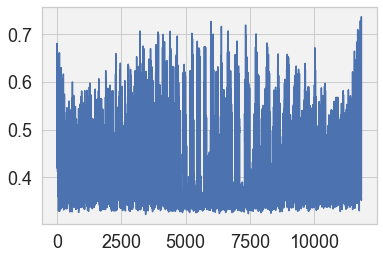

In [23]:
plt.plot(np.var(voxel_data_trial_avg[1], axis=0))

## Restricted labels

In [24]:
# align labels to the restricted samples that have been recorded, which is subject dependent
things_mhr = {s: np.concatenate([things_mh[s][val_stim_ordering[s]], things_mh[s][trn_stim_ordering[s]]], axis=0).astype(int) for s in subjects}
print ([things_mhr[s].shape for s in subjects])

[(10000, 12), (10000, 12), (9411, 12), (9209, 12), (10000, 12), (9411, 12), (10000, 12), (9209, 12)]


Minimum #samples = 599


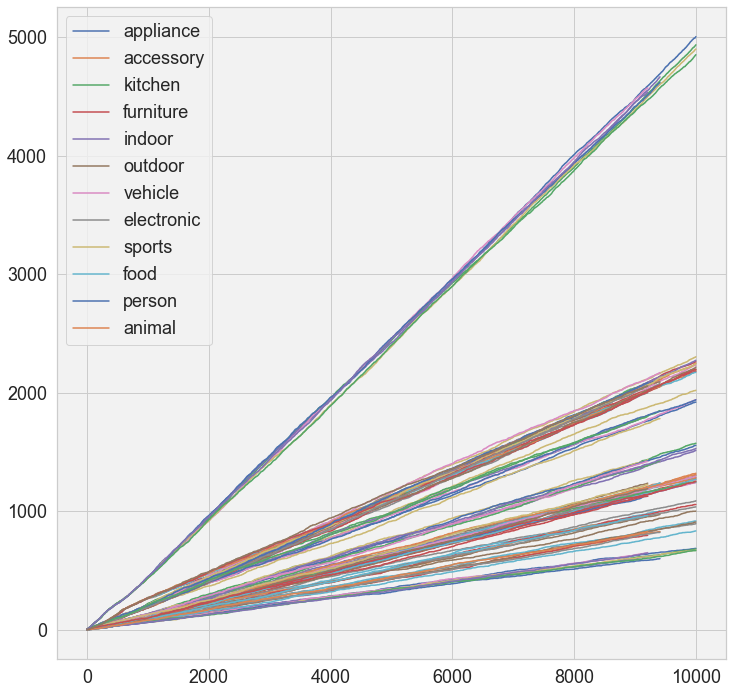

In [25]:
plt.figure(figsize=(12,12))
ymin = np.inf
for s in subjects:
    for k in range(len(thing_label_index)):
        y = np.cumsum(things_mhr[s][:,k], axis=0)
        if y[-1]<ymin:
            ymin = y[-1]
        plt.plot(y, label=thing_labelmap[k] if s==1 else None)
plt.legend(loc='upper left')
print ('Minimum #samples = %d'%ymin)

In [26]:
nsddata_supercat_all = voxel_data_trial_avg

# Data ROI 'features'

In [27]:
feature_dicts = {} # dict[#subject][#ROI]
for s in subjects:
    feature_dicts[s] = {}
    for roi_mask, roi_name in iterate_roi(group, voxel_roi[s], roi_map, group_names):
        feature_dicts[s][roi_name] = nsddata_supercat_all[s][:, roi_mask]

# Multifold few-shot error and geometry

In [52]:
m = 5
n_folds   = 16
n_samples = 16

from src.geometry import feature_subsampling_and_split, calculate_manifolds_error, calculate_manifolds_directions, calculate_manifolds_SNR

manifold_errs, manifold_SNRs = None, None
for f in range(n_folds):
    (err_feature_embs, err_labels, min_err_samples), (geom_feature_embs, geom_labels, min_geom_samples) = \
        feature_subsampling_and_split(feature_dicts, things_mhr, random_subspace=1000, random_projections=300, err_frac=.1)
    print (min_err_samples, min_geom_samples)

    manifold_err = calculate_manifolds_error(err_feature_embs, labels=err_labels, m=m, n_samples=n_samples)  
    manifold_SNR = calculate_manifolds_SNR(calculate_manifolds_directions(geom_feature_embs, labels=geom_labels, P=(min_geom_samples//100)*100), m=m)
    
    # aggregate estimates from all folds
    if manifold_errs is None:
        manifold_errs = {}
        for s,dd in manifold_err.items():   
            manifold_errs[s] = {'m': manifold_err[s]['m'], 'n_samples': manifold_err[s]['n_samples']}
            for f in ['err', 'std']:
                manifold_errs[s][f] = {}
                for r,d in dd[f].items():
                    manifold_errs[s][f][r] = [d,]
    else:
        for s,dd in manifold_err.items():   
            for f in ['err', 'std']:
                for r,d in dd[f].items():
                    manifold_errs[s][f][r] += [d,]
    if manifold_SNRs is None:
        manifold_SNRs = {}
        for s,dd in manifold_SNR.items():
            manifold_SNRs[s] = {'m': manifold_SNR[s]['m'], 'P': manifold_SNR[s]['P']}
            for f in ['Sign', 'Bias', 'Nsa', 'Nsb', 'Nss', 'Ds', 'SNR']:
                manifold_SNRs[s][f] = {}
                for r,d in dd[f].items():
                    manifold_SNRs[s][f][r] = [d,]       
    else:
        for s,dd in manifold_SNR.items():
            for f in ['Sign', 'Bias', 'Nsa', 'Nsb', 'Nss', 'Ds', 'SNR']:
                for r,d in dd[f].items():
                    manifold_SNRs[s][f][r] += [d,]
### convert list into array                    
for s,dd in manifold_errs.items():   
    for f in ['err', 'std']:
        for r,d in dd[f].items():
            manifold_errs[s][f][r] = np.array(d)
for s,dd in manifold_SNRs.items():
    for f in ['Sign', 'Bias', 'Nsa', 'Nsb', 'Nss', 'Ds', 'SNR']:
        for r,d in dd[f].items():
            manifold_SNRs[s][f][r] = np.array(d)

49 544


100%|██████████| 12/12 [00:01<00:00,  9.46it/s]


100%|██████████| 12/12 [00:00<00:00, 52.00it/s]


56 543


100%|██████████| 12/12 [00:04<00:00,  2.51it/s]


100%|██████████| 12/12 [00:00<00:00, 41.90it/s]


48 547


100%|██████████| 12/12 [00:01<00:00,  8.99it/s]


100%|██████████| 12/12 [00:00<00:00, 51.04it/s]


54 539


100%|██████████| 12/12 [00:01<00:00,  7.78it/s]


100%|██████████| 12/12 [00:00<00:00, 48.09it/s]


56 538


100%|██████████| 12/12 [00:01<00:00,  7.36it/s]


100%|██████████| 12/12 [00:00<00:00, 58.14it/s]


55 539


100%|██████████| 12/12 [00:01<00:00,  9.32it/s]


100%|██████████| 12/12 [00:00<00:00, 56.04it/s]


55 532


100%|██████████| 12/12 [00:01<00:00,  8.55it/s]


100%|██████████| 12/12 [00:00<00:00, 47.15it/s]


54 539


100%|██████████| 12/12 [00:01<00:00,  8.05it/s]


100%|██████████| 12/12 [00:00<00:00, 56.51it/s]


60 539


100%|██████████| 12/12 [00:01<00:00,  9.95it/s]


100%|██████████| 12/12 [00:00<00:00, 49.81it/s]


54 545


100%|██████████| 12/12 [00:01<00:00,  8.49it/s]


100%|██████████| 12/12 [00:00<00:00, 25.94it/s]


56 524


100%|██████████| 12/12 [00:01<00:00,  7.00it/s]


100%|██████████| 12/12 [00:00<00:00, 57.38it/s]


53 531


100%|██████████| 12/12 [00:01<00:00,  7.66it/s]


100%|██████████| 12/12 [00:00<00:00, 34.58it/s]


57 542


100%|██████████| 12/12 [00:01<00:00,  9.13it/s]


100%|██████████| 12/12 [00:00<00:00, 52.94it/s]


57 542


100%|██████████| 12/12 [00:01<00:00,  9.61it/s]


100%|██████████| 12/12 [00:00<00:00, 38.81it/s]


54 527


100%|██████████| 12/12 [00:01<00:00,  9.35it/s]


100%|██████████| 12/12 [00:00<00:00, 27.82it/s]


53 541


100%|██████████| 12/12 [00:01<00:00,  8.81it/s]


100%|██████████| 12/12 [00:00<00:00, 34.46it/s]


In [53]:
save_stuff( output_dir + 'nsddata_zmanifold_%dshot_err_all_rc'%(m), 
    flatten_dict(manifold_errs))

save_stuff( output_dir + 'nsddata_zmanifold_geom_SNR_all_rc', 
    flatten_dict(manifold_SNRs))

saved 1.m in h5py file
saved 1.n_samples in h5py file
saved 1.err.V1 in h5py file
saved 1.err.V2 in h5py file
saved 1.err.V3 in h5py file
saved 1.err.hV4 in h5py file
saved 1.err.V3ab in h5py file
saved 1.err.LO in h5py file
saved 1.err.IPS in h5py file
saved 1.err.VO in h5py file
saved 1.err.PHC in h5py file
saved 1.err.MT in h5py file
saved 1.err.MST in h5py file
saved 1.err.other in h5py file
saved 1.std.V1 in h5py file
saved 1.std.V2 in h5py file
saved 1.std.V3 in h5py file
saved 1.std.hV4 in h5py file
saved 1.std.V3ab in h5py file
saved 1.std.LO in h5py file
saved 1.std.IPS in h5py file
saved 1.std.VO in h5py file
saved 1.std.PHC in h5py file
saved 1.std.MT in h5py file
saved 1.std.MST in h5py file
saved 1.std.other in h5py file
saved 2.m in h5py file
saved 2.n_samples in h5py file
saved 2.err.V1 in h5py file
saved 2.err.V2 in h5py file
saved 2.err.V3 in h5py file
saved 2.err.hV4 in h5py file
saved 2.err.V3ab in h5py file
saved 2.err.LO in h5py file
saved 2.err.IPS in h5py file
sa

saved 3.Nss.V3ab in h5py file
saved 3.Nss.LO in h5py file
saved 3.Nss.IPS in h5py file
saved 3.Nss.VO in h5py file
saved 3.Nss.PHC in h5py file
saved 3.Nss.MT in h5py file
saved 3.Nss.MST in h5py file
saved 3.Nss.other in h5py file
saved 3.Ds.V1 in h5py file
saved 3.Ds.V2 in h5py file
saved 3.Ds.V3 in h5py file
saved 3.Ds.hV4 in h5py file
saved 3.Ds.V3ab in h5py file
saved 3.Ds.LO in h5py file
saved 3.Ds.IPS in h5py file
saved 3.Ds.VO in h5py file
saved 3.Ds.PHC in h5py file
saved 3.Ds.MT in h5py file
saved 3.Ds.MST in h5py file
saved 3.Ds.other in h5py file
saved 3.SNR.V1 in h5py file
saved 3.SNR.V2 in h5py file
saved 3.SNR.V3 in h5py file
saved 3.SNR.hV4 in h5py file
saved 3.SNR.V3ab in h5py file
saved 3.SNR.LO in h5py file
saved 3.SNR.IPS in h5py file
saved 3.SNR.VO in h5py file
saved 3.SNR.PHC in h5py file
saved 3.SNR.MT in h5py file
saved 3.SNR.MST in h5py file
saved 3.SNR.other in h5py file
saved 4.m in h5py file
saved 4.P in h5py file
saved 4.Sign.V1 in h5py file
saved 4.Sign.V2

## Theory validation plots

Main category = person


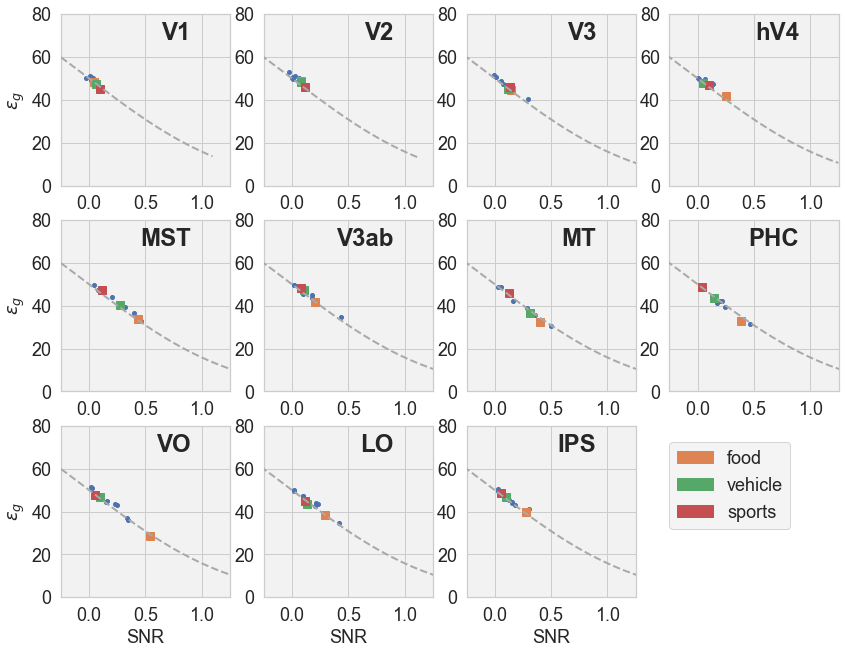

In [54]:
main_cat = 10
other_cat = [9, 6, 8]
cat_colors = {c: sns.color_palette()[k] for k,c in enumerate([main_cat,]+other_cat)}
print ('Main category = %s'%thing_labelmap[main_cat])

from src.geometry import H

subj = 1
n = len(plot_roi)
nx = 4
ny = int(np.ceil(n/nx))
fig=plt.figure(figsize=(3*nx, 3*ny))
plt.subplots_adjust(left=0.05, bottom=0.05, right=.95, top=.95, wspace=0.2, hspace=0.2) 
for k,r in enumerate(plot_roi):
    plt.subplot(ny, nx, k+1)   
    
    SNR = np.mean(manifold_SNRs[subj]['SNR'][r], axis=0)[main_cat]
    err = np.mean(manifold_errs[subj]['err'][r], axis=0)[main_cat] * 100
    plt.plot(SNR, err, marker='.', ms=8, linestyle='None', color=cat_colors[main_cat])
        
    for c in other_cat:
        x = np.mean(manifold_SNRs[subj]['SNR'][r], axis=0)[main_cat, c]
        y = np.mean(manifold_errs[subj]['err'][r], axis=0)[main_cat, c] * 100
        plt.plot(x, y, marker='s', color=cat_colors[c], ms=8, linestyle='None')
        #plt.text(x+0.1, y+0.05, thing_labelmap[c], fontsize=12)
    # Plot theory
    x = np.linspace(-1,np.nanmax(SNR)+1,50)
    plt.plot(x, H(x), c='darkgray', linestyle='dashed', linewidth=2, label='theory', zorder=99)
    plt.xlim([-.25, 1.25])
    plt.ylim([0, 80])
    if k>=8:
        plt.xlabel('SNR', fontsize=18)
    if k%nx==0:
        plt.ylabel(r'$\epsilon_g$', fontsize=18)
    plt.text(.9, 68, r, {'fontsize': 24, 'fontweight' : 'bold'}, horizontalalignment='right')
    
plt.gca().legend([Patch(color=cat_colors[c]) for c in other_cat], [thing_labelmap[c] for c in other_cat], loc=(1.2, 0.4))

In [55]:
filename = output_dir + "nsddata_manifold_5shot_error_vs_SNR_avg_%s_rc%s" % (thing_labelmap[main_cat], saveext)
fig.savefig(filename, **savearg)
plt.close()

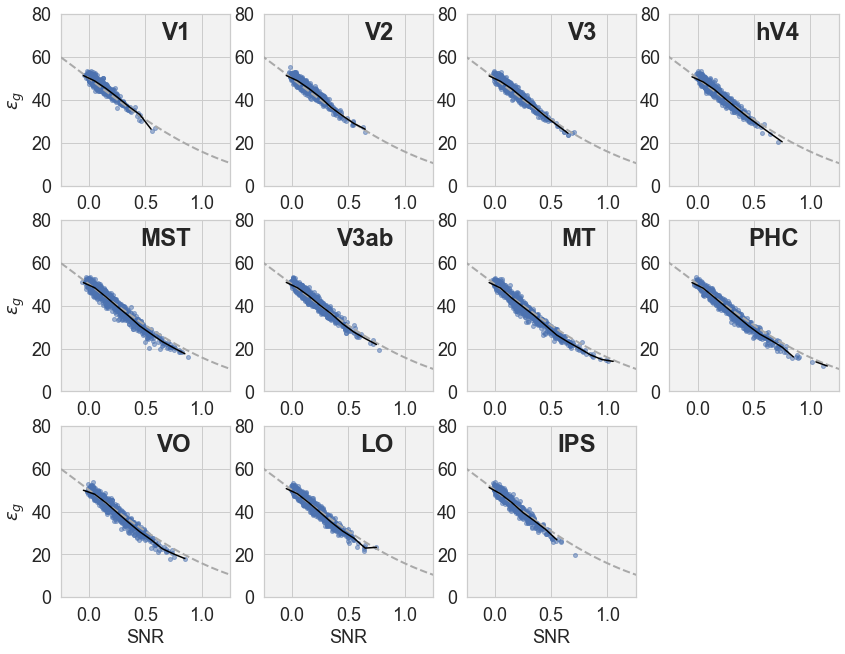

In [59]:
from src.geometry import H
from scipy.stats import binned_statistic

subj = 1
n = len(plot_roi)
nx = 4
ny = int(np.ceil(n/nx))
fig=plt.figure(figsize=(3*nx, 3*ny))
plt.subplots_adjust(left=0.05, bottom=0.05, right=.95, top=.95, wspace=0.2, hspace=0.2) 
for k,r in enumerate(plot_roi):
    plt.subplot(ny, nx, k+1)   
    
    SNR, err = [], []
    for s in subjects:
        SNR += [offdiagonal(np.mean(manifold_SNRs[s]['SNR'][r], axis=0)),]
        err += [offdiagonal(np.mean(manifold_errs[s]['err'][r], axis=0)) * 100,]
    SNR = np.array(SNR).flatten()
    err = np.array(err).flatten() 
    plt.plot(SNR, err, marker='.', ms=8, linestyle='None', color=cat_colors[main_cat], alpha=.5)
    bin_means, bin_edges, binnumber = binned_statistic(SNR, err, statistic='mean', bins=16, range=[-.1, 1.5])
    plt.plot((bin_edges[1:]+bin_edges[:-1])/2, bin_means, marker=None, linestyle='-', ms=4, color='k', zorder=100)
    
    # Plot theory
    x = np.linspace(-1,np.nanmax(SNR)+1,50)
    plt.plot(x, H(x), c='darkgray', linestyle='dashed', linewidth=2, label='theory', zorder=99)
    plt.xlim([-.25, 1.25])
    plt.ylim([0, 80])
    if k>=8:
        plt.xlabel('SNR', fontsize=18)
    if k%nx==0:
        plt.ylabel(r'$\epsilon_g$', fontsize=18)
    plt.text(.9, 68, r, {'fontsize': 24, 'fontweight' : 'bold'}, horizontalalignment='right')

In [60]:
filename = output_dir + "nsddata_manifold_5shot_error_vs_SNR_all_subjects_all_pairs_rc%s" % (saveext)
fig.savefig(filename, **savearg)
plt.close()

# Removing signal directions
Remove all signal direction components from all responses. Calculate the residual action w.r.t various concept orthogonal properties

In [63]:
def gs(A):
    B = np.copy(A)
    B[0,:] /= np.sqrt(np.sum(B[0,:]**2))
    for k in range(1, len(B)):
        B[k,:] = B[k,:] - np.dot(np.dot(B[k,:], B[:k].T), B[:k])
        B[k,:] /= np.sqrt(np.sum(B[k,:]**2))
    return B   

def find_noise_directions(mpc, s, roi, ca, cb):
    # calculate the normalized signal direction
    sm = s if s in mpc.keys() else '%d'%s
    r0a, r0b = mpc[sm]['R0'][roi][ca], mpc[sm]['R0'][roi][cb]
    Sd = r0b - r0a
    # orthogonalize basis wrt signal direction
    Uao = gs(np.concatenate([Sd[np.newaxis], mpc[sm]['Us'][roi][ca][:-1]], axis=0))
    Ubo = gs(np.concatenate([Sd[np.newaxis], mpc[sm]['Us'][roi][cb][:-1]], axis=0))
    # ANGLES
    # angles = np.arccos(np.matmul(Uao, Ubo.T) / np.outer(np.sqrt(np.sum(Uao**2, axis=1)), np.sqrt(np.sum(Ubo**2, axis=1))))
    return r0a, r0b, Uao, Ubo

def find_signal_aligned_directions(data, mpc, s, roi, ca, cb, P):
    from src.geometry import PCA_geometry
    sd = s if s in data.keys() else '%d'%s
    _, _, Uao, _ = find_noise_directions(mpc, s=s, roi=roi, ca=ca, cb=cb)
    ca = ca if ca in data[sd][roi].keys() else '%d'%ca
    cb = cb if cb in data[sd][roi].keys() else '%d'%cb
    A, B = data[sd][roi][ca], data[sd][roi][cb]
    _,_, _Ua = PCA_geometry(np.concatenate([A[:P] - np.outer(A[:P]@Uao[0:1].T, Uao[0:1]),\
                                            B[:P] - np.outer(B[:P]@Uao[0:1].T, Uao[0:1])], axis=0))
    #_,_, _Ua = PCA_geometry(A[:P] - np.outer(A[:P]@Uao[0:1].T, Uao[0:1]))
    _U = np.concatenate([Uao[0:1], _Ua[:-1]], axis=0)
    _Rsa = np.std(A[:P]@_U.T, axis=0)*np.sqrt(P)
    _Rsb = np.std(B[:P]@_U.T, axis=0)*np.sqrt(P)
    return _U, _Rsa, _Rsb


def sort_data_projections(data, index, s, roi, ca, cb, Nda, Ndb):
    sd = s if s in data.keys() else '%d'%s
    si = s if s in index.keys() else '%d'%s
    ca = ca if ca in data[sd][roi].keys() else '%d'%ca
    cb = cb if cb in data[sd][roi].keys() else '%d'%cb    
    # no need to substract the centroid since I already orthogonalized Nd from Sd
    Nproja = np.dot(data[sd][roi][ca], Nda) #/ np.sqrt(np.sum(data[sd][roi][ca]**2, axis=1))
    sortedImga = np.argsort(Nproja)
    sortedNproja = Nproja[sortedImga]
    Nproja_imgidx =  index[si][roi][ca][sortedImga]  
    
    Nprojb = np.dot(data[sd][roi][cb], Ndb) #/ np.sqrt(np.sum(data[sd][roi][cb]**2, axis=1))
    sortedImgb = np.argsort(Nprojb)
    sortedNprojb = Nprojb[sortedImgb]
    Nprojb_imgidx =  index[si][roi][cb][sortedImgb]  
    
    return Nproja_imgidx, sortedNproja, Nprojb_imgidx, sortedNprojb

def find_closest_examplar(mds, idx, coords=(0,0), blacklist=[]):
    '''return selected idx, selected coords'''
    mask = np.ones(len(mds), dtype=np.bool)
    for bl in blacklist:
        mask[idx==bl] = False 
    i = np.argmin(np.sum(( mds[mask] - np.array(coords)[np.newaxis, :] )**2, axis=1))
    return idx[mask][i], mds[mask][i]

def add_subplot_axes(fig, ax, rect):
    box = ax.get_position()
    infig_position = fig.transFigure.inverted().transform(ax.transAxes.transform(rect[0:2]))    
    w, h = box.width*rect[2], box.height*rect[3]
    subax = fig.add_axes([infig_position[0] - w/2, infig_position[1] - h/2, w, h], facecolor='w')  # matplotlib 2.0+
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

def get_data_position(fig, ax, pos):
    return fig.transFigure.inverted().transform(ax.transData.transform(pos))

def inlay_image(fig, ax, im, coords, size=0.05):
    pcoords = get_data_position(fig, ax, coords)
    sax=add_subplot_axes(fig, ax, list(pcoords) + [size, size])
    sax.imshow(im)
    sax.set_xticks([])
    sax.set_yticks([])

# Native geometry

In [ ]:
from src.geometry import calculate_manifolds_directions

nsddata_supercat_pca = calculate_manifolds_directions(feature_dicts, labels=things_mhr, P=580)

  8%|▊         | 1/12 [00:01<00:12,  1.12s/it]

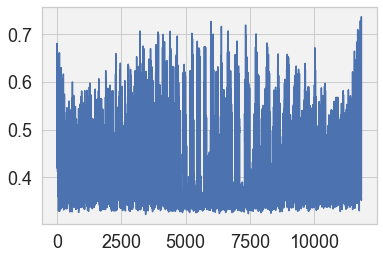

In [64]:
plt.plot(np.var(nsddata_supercat_all[1], axis=0))

## Divide activity into ROIs

In [65]:
manifolds_data_roi, manifolds_data_idx = {}, {}
for s in subjects:
    label = things_mhr[s].astype(bool)
    manifolds_data_roi[s], manifolds_data_idx[s] = {}, {}
    data = (nsddata_supercat_all[s] - np.mean(nsddata_supercat_all[s], axis=0, keepdims=True)) / np.std(nsddata_supercat_all[s], axis=0, keepdims=True)
    for m,r in iterate_roi(group, voxel_roi[s], roi_map, group_names):
        manifolds_data_roi[s][r], manifolds_data_idx[s][r] = {}, {}
        for k in range(things_mhr[s].shape[1]):
            manifolds_data_roi[s][r][k] = data[:, m][label[:,k]]
            manifolds_data_idx[s][r][k] = np.arange(len(label))[label[:,k]]

In [66]:
print (thing_labelmap)

{0: 'appliance', 1: 'accessory', 2: 'kitchen', 3: 'furniture', 4: 'indoor', 5: 'outdoor', 6: 'vehicle', 7: 'electronic', 8: 'sports', 9: 'food', 10: 'person', 11: 'animal'}


In [67]:
P = 580
ca, cb = 8, 9
print ([thing_labelmap[k] for k in [ca, cb]])
subj = 1

['sports', 'food']


## Find a coordinate system aligned with signal direction between manifold a and b

In [85]:
voxSIGN = {}
for k,s in enumerate(subjects):
    voxSIGN[s] = {}
    for roi_mask, roi_name in tqdm(iterate_roi(group, voxel_roi[s], roi_map, group_names)):
        r0a, r0b, Uao, Ubo = find_noise_directions(nsddata_supercat_pca, s=subj, roi=roi_name, ca=ca, cb=cb)
        Uab, Ra, Rb = find_signal_aligned_directions(manifolds_data_roi, nsddata_supercat_pca, s=s, roi=roi_name, ca=ca, cb=cb, P=P)
        voxroi = nsddata_supercat_all[s][:, roi_mask]
        voxroi = (voxroi - np.mean(voxroi, axis=0, keepdims=True)) / np.std(voxroi, axis=0, keepdims=True)
        voxSIGN[s][roi_name] = (voxroi)@Uab[:6].T 

12it [00:11,  1.01it/s]
12it [00:10,  1.14it/s]
12it [00:12,  1.03s/it]
12it [00:10,  1.11it/s]
12it [00:09,  1.25it/s]
12it [00:10,  1.16it/s]
12it [00:08,  1.36it/s]
12it [00:09,  1.26it/s]


### Highlight these point on the overall distribution in that ROI

In [69]:
cat_sel = [ca,cb] 
keypoint_cat = ca

print ({k: thing_labelmap[c] for k,c in enumerate(cat_sel)})
cat_colors = {c: sns.color_palette()[2*k%10] for k,c in enumerate(cat_sel)}

k, N = 0, len(thing_labelmap) - len(cat_sel)
for c in thing_labelmap.keys():
    if c not in cat_sel:
        cat_colors[c] = cm.get_cmap('magma', N)(k)
        k += 1

{0: 'sports', 1: 'food'}


[Text(0, -40.0, ''),
 Text(0, -30.0, ''),
 Text(0, -20.0, ''),
 Text(0, -10.0, ''),
 Text(0, 0.0, ''),
 Text(0, 10.0, ''),
 Text(0, 20.0, ''),
 Text(0, 30.0, ''),
 Text(0, 40.0, '')]

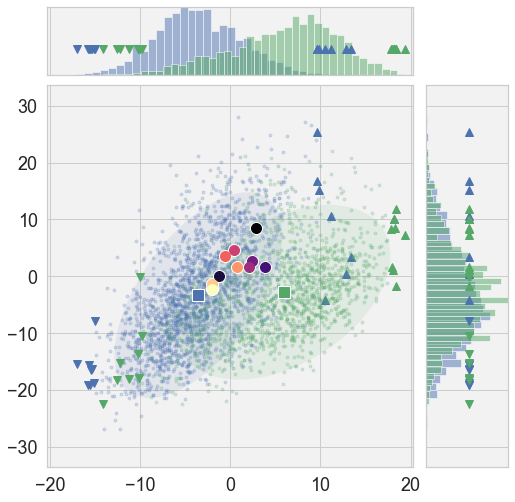

In [71]:
from src.plots import confidence_ellipse

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

frame = 60.
Nimg = 8
roi_name = 'PHC' 
direction = 0
cat_imgidx = {}

fig = plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=0.15, bottom=0.1, right=.95, top=.9, wspace=0.15, hspace=0.15) 
gsp = gridspec.GridSpec(6, 5)
ax_main = plt.subplot(gsp[1:, :-1])
ax_xDist = plt.subplot(gsp[0, :-1]) #, sharex=ax_main)
ax_yDist = plt.subplot(gsp[1:, -1])

rx, ry = 0,0
hx_max, hy_max = 0.04, 0.04
float_x, float_y = .85*hx_max, .85*hy_max #0.04 #0.06
for j,c in thing_labelmap.items():
    
    mask = things_mhr[subj][:,j].astype(bool)
    idxes = np.arange(len(mask))[mask]
    r = voxSIGN[subj][roi_name][mask]    
    rx, ry = max(rx, np.max(np.abs(r[:,direction]))), max(ry, np.max(np.abs(r[:,1-direction])))
    
    if j in cat_sel:
        ax_main.plot(r[:,direction], r[:,1-direction], marker='.', linestyle='None', color=cat_colors[j], alpha=.2)   
        hx = ax_xDist.hist(r[:,direction],   bins=40, density=True, color=cat_colors[j], alpha=.5) 
        hy = ax_yDist.hist(r[:,1-direction], bins=40, density=True, color=cat_colors[j], alpha=.5, orientation='horizontal') 
        hx_max = max(np.max(hx[0]), hx_max)
        hy_max = max(np.max(hy[0]), hy_max)
        confidence_ellipse(r[:,direction], r[:,1-direction], ax_main, n_std=2.0, facecolor=cat_colors[j], alpha=.1)
        
        ax_main.plot(np.mean(r[:,direction]), np.mean(r[:,1-direction]), marker='s', ms=12, color='w', zorder=990)
        ax_main.plot(np.mean(r[:,direction]), np.mean(r[:,1-direction]), marker='s', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j])  
        
        sorted_local_idxes = np.argsort(r[:,direction])
        sorted_idxes = idxes[sorted_local_idxes]
        cat_imgidx[j] = sorted_idxes
        
        ax_main.plot(r[sorted_local_idxes[:Nimg], direction], r[sorted_local_idxes[:Nimg], 1-direction],  linestyle='None', ms=8, marker='v', color=cat_colors[j] )
        ax_main.plot(r[sorted_local_idxes[-Nimg:],direction], r[sorted_local_idxes[-Nimg:],1-direction], linestyle='None', ms=8, marker='^', color=cat_colors[j] ) 
        
        ax_xDist.plot(r[sorted_local_idxes[:Nimg], direction], [float_x]*Nimg, linestyle='None', ms=8, marker='v', color=cat_colors[j] )
        ax_xDist.plot(r[sorted_local_idxes[-Nimg:], direction],[float_x]*Nimg, linestyle='None', ms=8, marker='^', color=cat_colors[j] ) 
        
        ax_yDist.plot([float_y]*Nimg, r[sorted_local_idxes[:Nimg], 1-direction], linestyle='None', ms=8, marker='v', color=cat_colors[j] )
        ax_yDist.plot([float_y]*Nimg, r[sorted_local_idxes[-Nimg:], 1-direction], linestyle='None', ms=8, marker='^', color=cat_colors[j] )         
    else:
        ax_main.plot(np.mean(r[:,direction]), np.mean(r[:,1-direction]), marker='o', ms=12, color='w', zorder=990)
        ax_main.plot(np.mean(r[:,direction]), np.mean(r[:,1-direction]), marker='o', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j])  
                  
ax_main.set_xlim([-rx*1.05, rx*1.05])
ax_main.set_ylim([-ry*1.05, ry*1.05])

#ax_main.legend(loc=(1.02, 0.), fontsize=18)
###
ax_xDist.set_xlim([-rx*1.05, rx*1.05])
ax_xDist.set_ylim([0, hx_max])
#ax_xDist.set_yscale('log')
ax_xDist.set_yticks([0, hx_max])
ax_xDist.set_xticklabels([])
ax_xDist.set_yticklabels([])

#ax_yDist.set(xlabel='count')
ax_yDist.set_ylim([-ry*1.05, ry*1.05])
ax_yDist.set_xlim([0, hy_max])
#ax_yDist.set_xscale('log')
ax_yDist.set_xticks([0, hy_max])
ax_yDist.set_xticklabels([])
ax_yDist.set_yticklabels([])

In [85]:
filename = output_dir + "nsddata_manifold_S%02d_%s_CAT_%s_%s_DIR_%d_v2%s" % (subj, roi_name, thing_labelmap[ca], thing_labelmap[cb], direction, saveext)
fig.savefig(filename, **savearg)
plt.close()

In [68]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(ax_main.legend(loc=(1.25, 0.), fontsize=18), \
              filename = output_dir + "nsddata_manifold_CAT_%s_%s_legend_v2%s"%(thing_labelmap[ca], thing_labelmap[cb], saveext)
             )

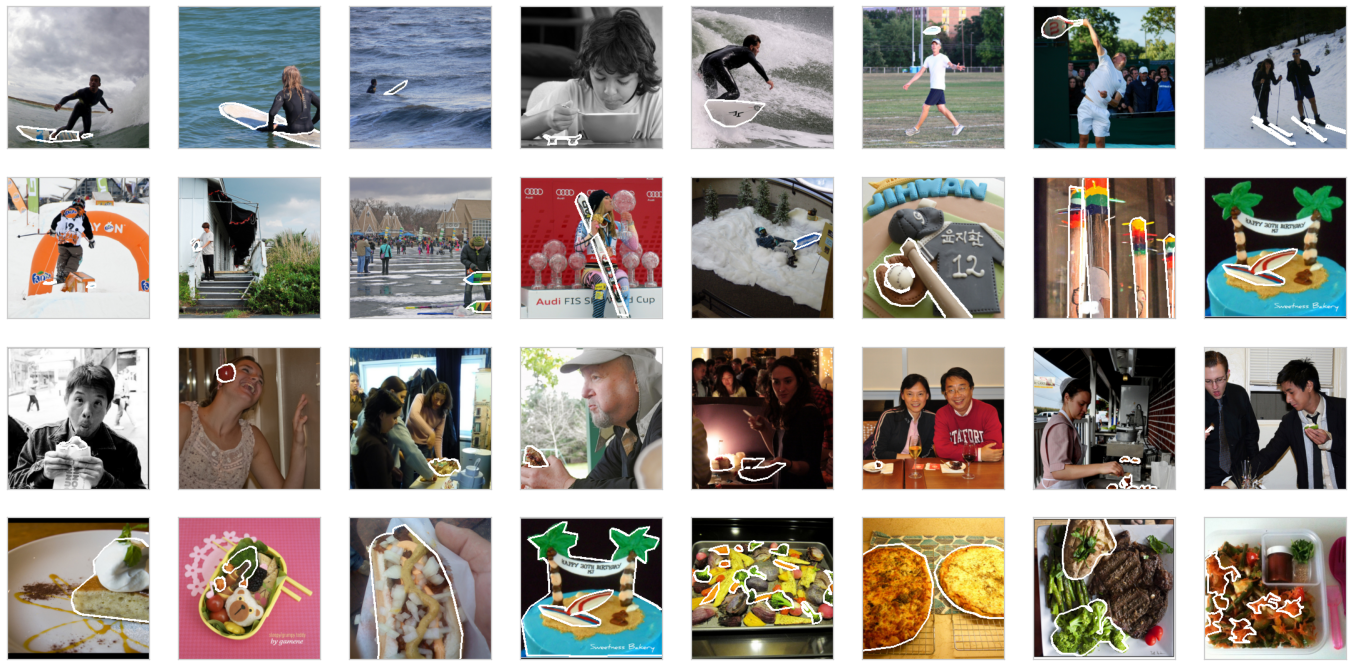

In [69]:
from src.plots import highlight_mask, apply_highlight

fig=plt.figure(figsize=(3*Nimg,3*4))
for i,(imgmin,imgmax) in enumerate(zip(cat_imgidx[ca][:Nimg], cat_imgidx[ca][-Nimg:])):
    plt.subplot(4, Nimg, i+1)
    
    hl = highlight_mask(cat_data[subj]['labels'][imgmin], ca, lw=3)
    im = apply_highlight(stim_data[subj][imgmin].transpose(1,2,0), hl, color=[1,1,1])
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])
    
    plt.subplot(4, Nimg, Nimg+i+1)
    hl = highlight_mask(cat_data[subj]['labels'][imgmax], ca, lw=3)
    im = apply_highlight(stim_data[subj][imgmax].transpose(1,2,0), hl, color=[1,1,1])    
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])
    
for i,(imgmin,imgmax) in enumerate(zip(cat_imgidx[cb][:Nimg], cat_imgidx[cb][-Nimg:])):
    plt.subplot(4, Nimg, 2*Nimg+i+1)
    
    hl = highlight_mask(cat_data[subj]['labels'][imgmin], cb, lw=3)
    im = apply_highlight(stim_data[subj][imgmin].transpose(1,2,0), hl, color=[1,1,1])
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])
    
    plt.subplot(4, Nimg, 2*Nimg+Nimg+i+1)
    hl = highlight_mask(cat_data[subj]['labels'][imgmax], cb, lw=3)
    im = apply_highlight(stim_data[subj][imgmax].transpose(1,2,0), hl, color=[1,1,1])    
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])

---
## Signal-direction images

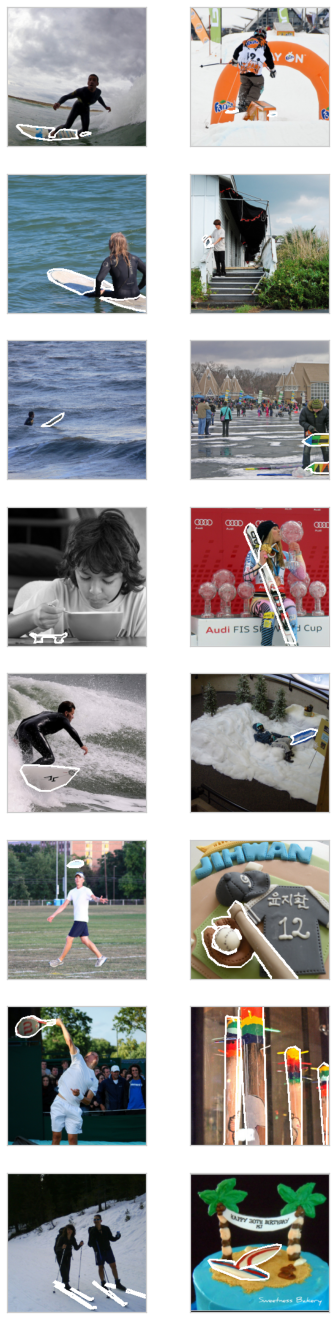

In [70]:
fig=plt.figure(figsize=(3*2, 3*Nimg))
for i,(imgmin,imgmax) in enumerate(zip(cat_imgidx[ca][:Nimg], cat_imgidx[ca][-Nimg:])):
    plt.subplot(Nimg, 2, 2*i+1)
    
    hl = highlight_mask(cat_data[subj]['labels'][imgmin], ca, lw=3)
    im = apply_highlight(stim_data[subj][imgmin].transpose(1,2,0), hl, color=[1,1,1])
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])
    
    plt.subplot(Nimg, 2, 2*i+2)
    hl = highlight_mask(cat_data[subj]['labels'][imgmax], ca, lw=3)
    im = apply_highlight(stim_data[subj][imgmax].transpose(1,2,0), hl, color=[1,1,1])    
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])

In [71]:
filename = output_dir + "nsddata_manifold_S%02d_%s_CAT_%s_%s_DIR_%d_extreme_samples%s" % (subj, roi_name, thing_labelmap[ca], thing_labelmap[cb], direction, saveext)
fig.savefig(filename, **savearg)
plt.close()

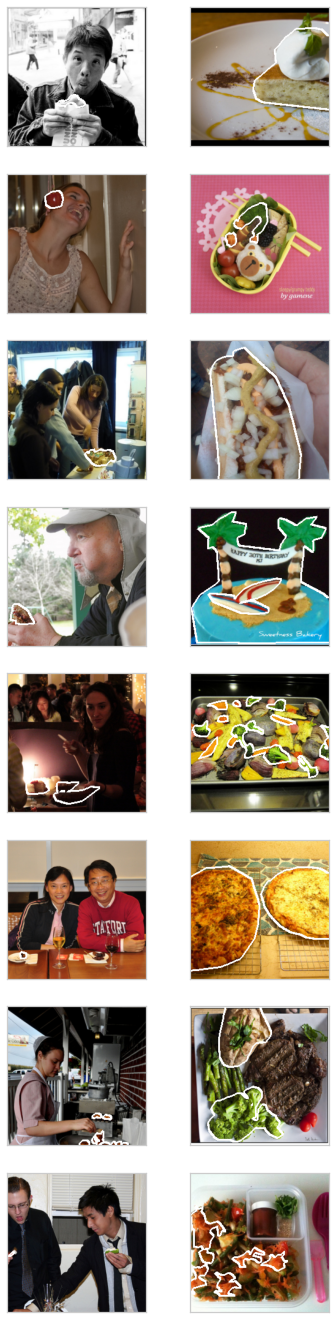

In [72]:
# cat_data[subj]['labels'][j]

fig=plt.figure(figsize=(3*2, 3*Nimg))
for i,(imgmin,imgmax) in enumerate(zip(cat_imgidx[cb][:Nimg], cat_imgidx[cb][-Nimg:])):
    plt.subplot(Nimg, 2, 2*i+1)
    
    hl = highlight_mask(cat_data[subj]['labels'][imgmin], cb, lw=3)
    im = apply_highlight(stim_data[subj][imgmin].transpose(1,2,0), hl, color=[1,1,1])
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])
    
    plt.subplot(Nimg, 2, 2*i+2)
    hl = highlight_mask(cat_data[subj]['labels'][imgmax], cb, lw=3)
    im = apply_highlight(stim_data[subj][imgmax].transpose(1,2,0), hl, color=[1,1,1])    
    plt.imshow(im)
    plt.grid(False); plt.gca().set_xticks([]); plt.gca().set_yticks([])

In [73]:
filename = output_dir + "nsddata_manifold_S%02d_%s_CAT_%s_%s_DIR_%d_extreme_samples%s" % (subj, roi_name, thing_labelmap[cb], thing_labelmap[ca], direction, saveext)
fig.savefig(filename, **savearg)
plt.close()

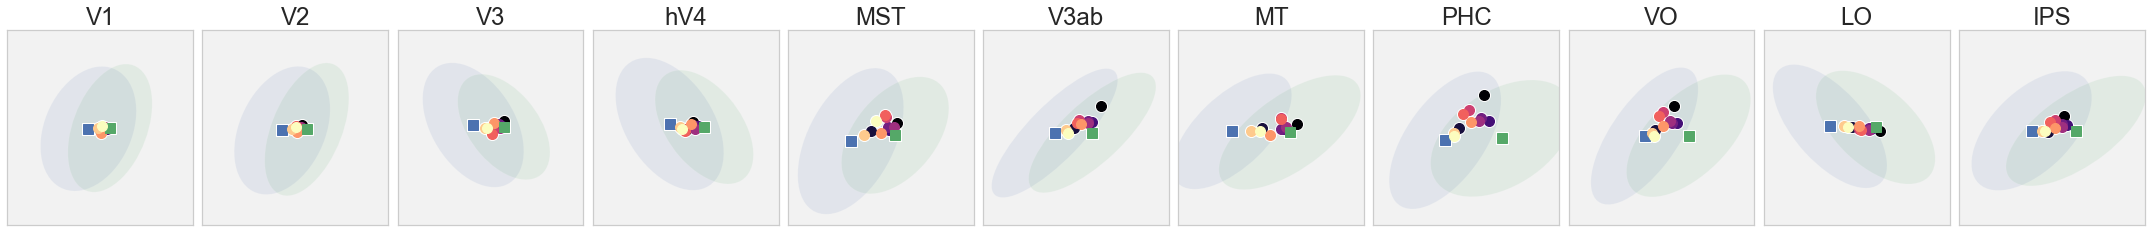

In [77]:
subj = 1
nx = 12
ny = int(np.ceil(len(group_names) / nx)) # len(subjects)

d0, d1 = 0,1

fig=plt.figure(figsize=(3*nx, 3*ny))
plt.subplots_adjust(left=0.05, bottom=0.05, right=.95, top=.95, wspace=0.05, hspace=0.1) 
for k,roi_name in enumerate(plot_roi):
    plt.subplot(ny, nx, k+1)     
    rx,ry = 0,0
    for j,c in thing_labelmap.items():
        mask = things_mhr[subj][:,j].astype(bool)
        r = voxSIGN[subj][roi_name][mask]    
        rx, ry = max(rx, np.max(np.abs(r[:,d0]))), max(ry, np.max(np.abs(r[:,d1])))
        #confidence_ellipse(r[:,d0], r[:,d1], plt.gca(), n_std=1.0, facecolor=cat_colors[j], alpha=.1)
        if j in cat_sel:
            #plt.plot(r[:,d0], r[:,d1], marker='.', linestyle='None', color=cat_colors[j], alpha=.2)
            confidence_ellipse(r[:,d0], r[:,d1], plt.gca(), n_std=2.0, facecolor=cat_colors[j], alpha=.1)
            #sns.kdeplot(x=r[:,0], y=r[:,1], color=cat_colors[c], levels=[0.25], gridsize=50, fill=False)
            plt.plot(np.mean(r[:,d0]), np.mean(r[:,d1]), marker='s', ms=12, color='w', zorder=990)
            plt.plot(np.mean(r[:,d0]), np.mean(r[:,d1]), marker='s', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j])   
        else:
            plt.plot(np.mean(r[:,d0]), np.mean(r[:,d1]), marker='o', ms=12, color='w', zorder=990)
            plt.plot(np.mean(r[:,d0]), np.mean(r[:,d1]), marker='o', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j]) 
            
    plt.xlim([-rx*.8, rx*.8])
    plt.ylim([-ry*.8, ry*.8])
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.title(roi_name)

In [78]:
filename = output_dir + "nsddata_manifold_S%02d_v2%s" % (subj, saveext)
fig.savefig(filename, **savearg)
plt.close()

---
# Image distribution all around the manifolds

In [86]:
from src.plots import highlight_mask, apply_highlight

keypoints_loc = np.array([(100, 100), (50, 100), (0, 100), (-50, 100), (-100, 100), (-100, 50), (-100, 0), (-100, -50), (-100, -100), (-50, -100), (0, -100), (50, -100), (100, -50), (100, 0), (100, 50)]).astype(np.float) / 100
keypoints = keypoints_loc * 100

PHC :  sports


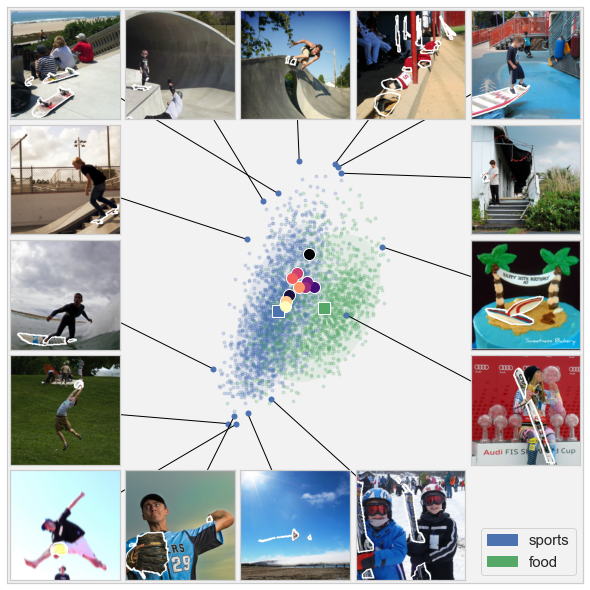

In [90]:
subj = 1
roi_name = 'PHC'
frame = 60.

fig=plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1., wspace=0.0, hspace=0.0) 
for j,c in thing_labelmap.items():
    mask = things_mh[subj][:,j].astype(bool)
    r = voxSIGN[subj][roi_name][mask]    
    if j in cat_sel:
        plt.plot(r[:,0], r[:,1], marker='.', linestyle='None', color=cat_colors[j], alpha=.2)
        confidence_ellipse(r[:,0], r[:,1], plt.gca(), n_std=2.0, facecolor=cat_colors[j], alpha=.1)
        plt.plot(np.mean(r[:,0]), np.mean(r[:,1]), marker='s', ms=12, color='w', zorder=990)
        plt.plot(np.mean(r[:,0]), np.mean(r[:,1]), marker='s', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j])   
    else:
        plt.plot(np.mean(r[:,0]), np.mean(r[:,1]), marker='o', ms=12, color='w', zorder=990)
        plt.plot(np.mean(r[:,0]), np.mean(r[:,1]), marker='o', ms=10, color=cat_colors[j], zorder=999, linestyle='None', label=thing_labelmap[j])  
    
plt.xlim([-frame, frame])
plt.ylim([-frame, frame])
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
fig, ax = plt.gcf(), plt.gca()
bl = []
for kp, kpl in zip(keypoints, keypoints_loc):
    xy = np.array(kpl) * frame * 4/5
    mask = things_mh[subj][:,keypoint_cat].astype(bool)
    idx, mds = find_closest_examplar(voxSIGN[subj][roi_name][mask][:,:2], np.arange(len(mask))[mask], coords=kp, blacklist=bl)
    bl += [idx,]
    ax.plot([xy[0], mds[0]], [xy[1], mds[1]], color='k', lw=1)
    ax.plot(mds[0], mds[1], marker='.', ms=10, color=cat_colors[keypoint_cat])
    
    hl = highlight_mask(cat_data[subj]['labels'][idx], keypoint_cat, lw=3)
    im = apply_highlight(stim_data[subj][idx].transpose(1,2,0), hl, color=[1,1,1])  
    
    inlay_image(fig, ax, im, xy, size=0.19)
    
print (roi_name, ': ', thing_labelmap[keypoint_cat])

from matplotlib.patches import Rectangle
custom_lines = [Rectangle([0,0], 1,1, color=cat_colors[c]) for c in cat_sel]
custom_names = [thing_labelmap[c] for c in cat_sel] 
if keypoint_cat not in cat_sel:
    custom_lines += [Rectangle([0,0], 1,1, color=cat_colors[keypoint_cat])]
    custom_names += [thing_labelmap[keypoint_cat]]
ax.legend(custom_lines, custom_names, loc='lower right', bbox_to_anchor=(1., 0.), fontsize=15)

In [263]:
filename = output_dir + "nsddata_manifold_S%02d_%s_CAT_%s%s" % (subj, roi_name, thing_labelmap[keypoint_cat], saveext)
fig.savefig(filename, **savearg)
plt.close()